In [1]:
import requests
url = 'https://raw.githubusercontent.com/codebasics/math-for-machine-learning/main/3_normal_distribution/Exercise/bhp.csv'
res = requests.get(url, allow_redirects = True)
with open("banglore_price.csv", 'wb') as file:
    file.write(res.content)

In [2]:
import pandas as pd
df = pd.read_csv("banglore_price.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

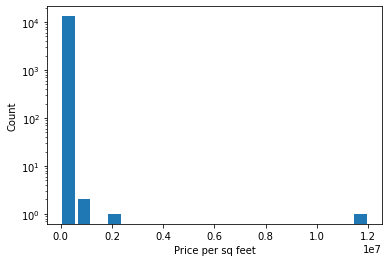

In [4]:
import matplotlib.pyplot as plt
plt.hist(df.price_per_sqft, bins = 20, rwidth=0.8)
plt.xlabel("Price per sq feet")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

In [5]:
ll, ul = df.price_per_sqft.quantile([0.001, 0.999])
ll, ul

(1366.184, 50959.36200000098)

In [6]:
outliers = df[(df.price_per_sqft < ll) | (df.price_per_sqft > ul)]
outliers.shape

(28, 7)

In [7]:
outliers.max().price_per_sqft

12000000

In [8]:
df_by_percentile = df[(df.price_per_sqft > ll) & (df.price_per_sqft < ul)]
df_by_percentile.shape

(13172, 7)

In [9]:
mal = df_by_percentile.price_per_sqft.mean() + 4*df_by_percentile.price_per_sqft.std()
mil = df_by_percentile.price_per_sqft.mean() - 4*df_by_percentile.price_per_sqft.std()
mal, mil

(23227.73653589429, -9900.429065502549)

In [10]:
df_by_std = df_by_percentile[(df_by_percentile.price_per_sqft > mil) & 
                             (df_by_percentile.price_per_sqft < mal)]
df_by_std.shape

(13047, 7)

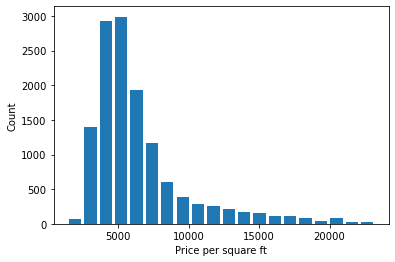

In [11]:
plt.hist(df_by_std.price_per_sqft, bins = 20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

[Text(0.5, 0, 'Price'), Text(0, 0.5, 'Count')]

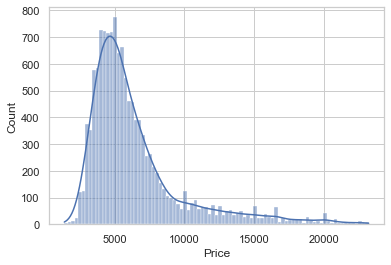

In [12]:
import seaborn as sns
sns.set(style = 'whitegrid')
g = sns.histplot(x=df_by_std.price_per_sqft, data = df_by_std, kde=True)
g.set(xlabel = "Price", ylabel = "Count")

# Z-Score : (x - mean)/std

In [13]:
df_by_percentile['z-score'] = (df_by_percentile.price_per_sqft - df_by_percentile.price_per_sqft.mean()) / df_by_percentile.price_per_sqft.std()
df_by_percentile.sample(15)

<ipython-input-13-c2f73ee6b762>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_percentile['z-score'] = (df_by_percentile.price_per_sqft - df_by_percentile.price_per_sqft.mean()) / df_by_percentile.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
9677,Marathahalli,2 BHK,1270.00,2.0,73.00,2,5748,-0.221118
10178,Electronic City,2 BHK,1065.00,2.0,30.76,2,2888,-0.911769
7222,Hebbal,3 BHK,1355.00,3.0,83.87,3,6189,-0.114622
2261,Bannerghatta Road,2 BHK,1255.00,2.0,65.26,2,5200,-0.353452
3074,Hosa Road,3 BHK,1541.00,3.0,69.84,3,4532,-0.514765
5101,Seegehalli,2 BHK,1096.00,2.0,41.00,2,3740,-0.706022
6786,Ardendale,3 BHK,1777.26,3.0,105.00,3,5907,-0.182722
8186,Electronic City,3 BHK,1470.00,2.0,44.10,3,3000,-0.884722
139,Yelahanka,5 BHK,3050.00,5.0,213.00,5,6983,0.077118
11473,other,2 BHK,1500.00,2.0,60.00,2,4000,-0.643236


In [14]:
df_by_z_score = df_by_percentile[(df_by_percentile['z-score'] > -4) & (df_by_percentile['z-score'] < 4)]
df_by_z_score.shape

(13047, 8)

In [15]:
df_by_std.shape[0] - df_by_z_score.shape[0]

0